Import libraries and data

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Create path
path= r'C:\Users\jerem\anaconda\Happiness Project\Data'

In [3]:
# Import data
happi= pd.read_pickle(os.path.join(path, 'happi.pkl'))

In [4]:
# Remove categorical data
happi.head()

Country  Happiness Rank  Happiness Score  Economy GDPP  Family Social  \
0  Switzerland               1            7.587       1.39651        1.34951   
1      Iceland               2            7.561       1.30232        1.40223   
2      Denmark               3            7.527       1.32548        1.36058   
3       Norway               4            7.522       1.45900        1.33095   
4       Canada               5            7.427       1.32629        1.32261   

   Life Expectancy  Freedom    Trust  Generosity  Year GDPP category  
0          0.94143  0.66557  0.41978     0.29678  2015     High GDPP  
1          0.94784  0.62877  0.14145     0.43630  2015     High GDPP  
2          0.87464  0.64938  0.48357     0.34139  2015     High GDPP  
3          0.88521  0.66973  0.36503     0.34699  2015     High GDPP  
4          0.90563  0.63297  0.32957     0.45811  2015     High GDPP

In [5]:
happy= happi[['Happiness Rank', 'Happiness Score', 'Economy GDPP', 'Family Social', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Year']]

In [6]:
happy.head()

Happiness Rank  Happiness Score  Economy GDPP  Family Social  \
0               1            7.587       1.39651        1.34951   
1               2            7.561       1.30232        1.40223   
2               3            7.527       1.32548        1.36058   
3               4            7.522       1.45900        1.33095   
4               5            7.427       1.32629        1.32261   

   Life Expectancy  Freedom    Trust  Generosity  Year  
0          0.94143  0.66557  0.41978     0.29678  2015  
1          0.94784  0.62877  0.14145     0.43630  2015  
2          0.87464  0.64938  0.48357     0.34139  2015  
3          0.88521  0.66973  0.36503     0.34699  2015  
4          0.90563  0.63297  0.32957     0.45811  2015

In [7]:
# Perform elbow technique
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [8]:
score = [kmeans[i].fit(happy).score(happy) for i in range(len(kmeans))]

C:\Users\jerem\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jerem\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\jerem\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jerem\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [9]:
score

[-1597233.7540675069,
 -400711.32595081965,
 -179157.211834047,
 -101484.73091615422,
 -65761.68350073136,
 -46315.501961345646,
 -34430.58013342468,
 -26843.96805209927,
 -21500.04647228768]

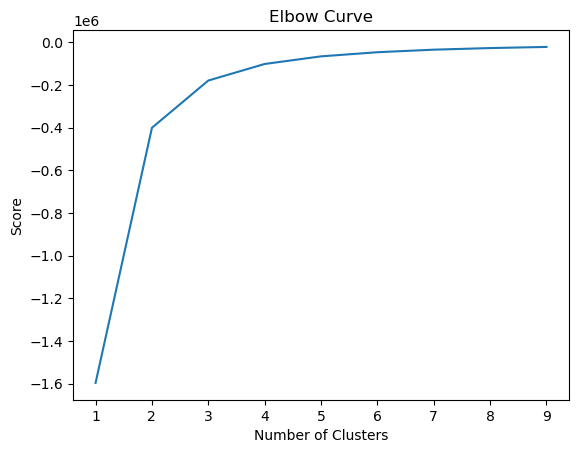

In [10]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I am going to use 3 clusters since there seems to be a "flattening" after 3.

In [11]:
# Run kmeans
kmeans = KMeans(n_clusters=3)

In [12]:
kmeans.fit(happy)

C:\Users\jerem\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jerem\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3)

In [13]:
happy['clusters'] = kmeans.fit_predict(happy)

C:\Users\jerem\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jerem\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\jerem\AppData\Local\Temp\ipykernel_27408\1732997022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy['clusters'] = kmeans.fit_predict(happy)


In [14]:
happy.head()

Happiness Rank  Happiness Score  Economy GDPP  Family Social  \
0               1            7.587       1.39651        1.34951   
1               2            7.561       1.30232        1.40223   
2               3            7.527       1.32548        1.36058   
3               4            7.522       1.45900        1.33095   
4               5            7.427       1.32629        1.32261   

   Life Expectancy  Freedom    Trust  Generosity  Year  clusters  
0          0.94143  0.66557  0.41978     0.29678  2015         1  
1          0.94784  0.62877  0.14145     0.43630  2015         1  
2          0.87464  0.64938  0.48357     0.34139  2015         1  
3          0.88521  0.66973  0.36503     0.34699  2015         1  
4          0.90563  0.63297  0.32957     0.45811  2015         1

In [15]:
happy['clusters'].value_counts()

clusters
0    265
1    260
2    257
Name: count, dtype: int64

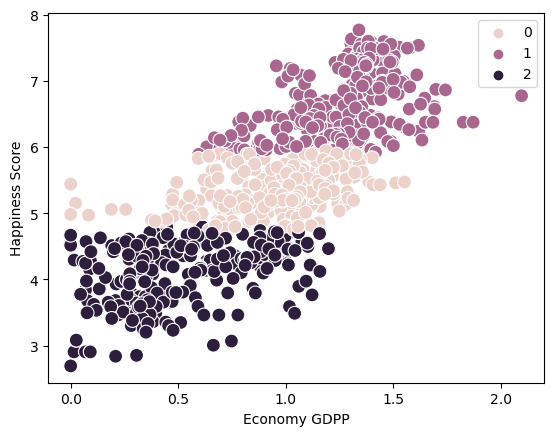

In [17]:
# Plot clusters
scata = sns.scatterplot(x=happy['Economy GDPP'], y=happy['Happiness Score'], hue=kmeans.labels_, s=100)
scata.grid(False)
plt.xlabel('Economy GDPP')
plt.ylabel('Happiness Score')
plt.show()

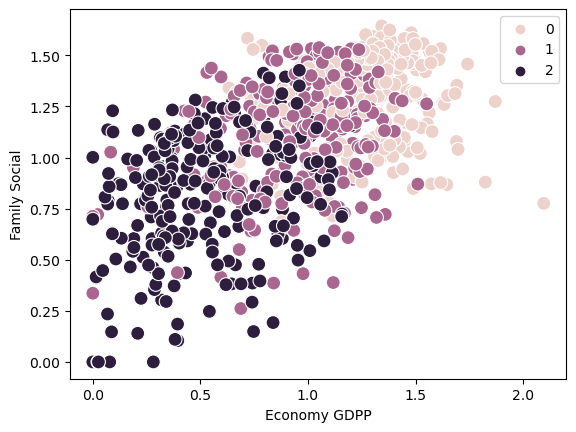

In [34]:
scatb = sns.scatterplot(x=happy['Economy GDPP'], y=happy['Family Social'], hue=kmeans.labels_, s=100)
scatb.grid(False)
plt.xlabel('Economy GDPP')
plt.ylabel('Family Social')
plt.show()

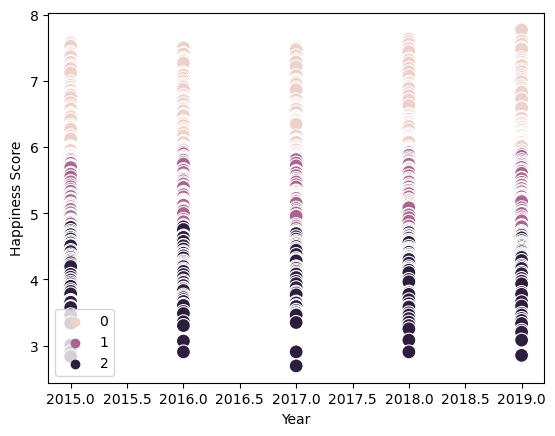

In [35]:
scatc = sns.scatterplot(x=happy['Year'], y=happy['Happiness Score'], hue=kmeans.labels_, s=100)
scatc.grid(False)
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.show()

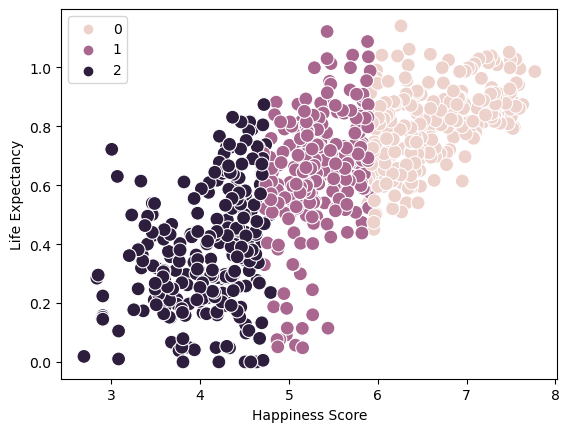

In [36]:
scatd = sns.scatterplot(x=happy['Happiness Score'], y=happy['Life Expectancy'], hue=kmeans.labels_, s=100)
scatd.grid(False)
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')
plt.show()

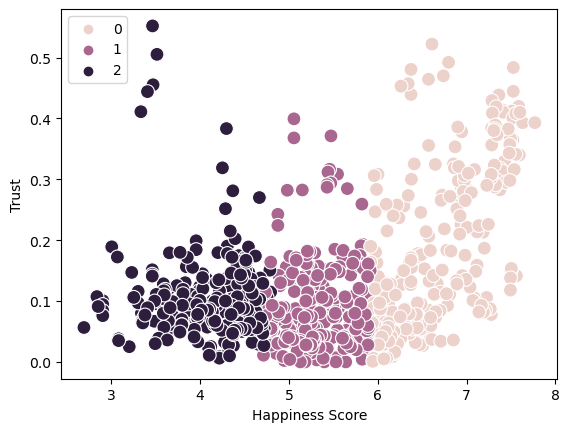

In [37]:
scate = sns.scatterplot(x=happy['Happiness Score'], y=happy['Trust'], hue=kmeans.labels_, s=100)
scate.grid(False)
plt.xlabel('Happiness Score')
plt.ylabel('Trust')
plt.show()

These clusters make sense since the better the economy, health, familial support, and government trust, the higher the happiness score. It would make sense that places with better economies also have better health systems, and better health systems could create more trsut.

In [19]:
# Calculate descriptive stats
happy.groupby('clusters').agg({'Happiness Score':['mean', 'median'],
                              'Economy GDPP':['mean', 'median'],
                              'Family Social':['mean', 'median'],
                              'Freedom':['mean', 'median'],
                              'Trust':['mean', 'median'],
                              'Life Expectancy':['mean', 'median'],
                              'Generosity':['mean', 'median']})

Happiness Score         Economy GDPP          Family Social  \
                    mean  median         mean   median          mean   
clusters                                                               
0               5.363317  5.3140     0.956368  0.99602      1.118939   
1               6.652004  6.5585     1.265592  1.30782      1.299199   
2               4.107362  4.2180     0.520847  0.46038      0.813200   

                     Freedom               Trust           Life Expectancy  \
            median      mean    median      mean    median            mean   
clusters                                                                     
0         1.160837  0.388057  0.406610  0.088820  0.072976        0.652487   
1         1.323055  0.514785  0.536373  0.184996  0.145340        0.803007   
2         0.850000  0.329937  0.348588  0.102883  0.087000        0.378281   

                   Generosity         
            median       mean median  
clusters                              
0         0.661570   0.189583  0.181  
1         0.816044   0.247247  0.242  
2         0.357000   0.219466  0.202

Cluster 0 has higher stats than all of the other clusters. This makes me think that a good economy, health, and social support all lead to a high score. It also seems that lower economy, poor health, and support lead to lower scores.

I think these results would be good to show that there are a lot of factors that go into a Happiness Score, and the better the factors, the better the scores.

In [26]:
happy.head()

Happiness Rank  Happiness Score  Economy GDPP  Family Social  \
0               1            7.587       1.39651        1.34951   
1               2            7.561       1.30232        1.40223   
2               3            7.527       1.32548        1.36058   
3               4            7.522       1.45900        1.33095   
4               5            7.427       1.32629        1.32261   

   Life Expectancy  Freedom    Trust  Generosity  Year  clusters  
0          0.94143  0.66557  0.41978     0.29678  2015         1  
1          0.94784  0.62877  0.14145     0.43630  2015         1  
2          0.87464  0.64938  0.48357     0.34139  2015         1  
3          0.88521  0.66973  0.36503     0.34699  2015         1  
4          0.90563  0.63297  0.32957     0.45811  2015         1

In [27]:
happy.to_csv(os.path.join(path, 'happy.csv'))